# Descripción y Exploración de datos(Parte 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def por_mes(data, mes):
    data['fecha']=pd.to_datetime(data['fecha'])
    return data[data['fecha'].dt.month == mes]

''' Leer archivos'''
def leer_archivo(archivo):
    if (archivo.count('indices') > 0):
        ruta = '../datos/3.0.spi_spei/'
    else:
        ruta = '../datos/1.0.variables/'   
    data = pd.read_csv(ruta + archivo)    
    data['fecha'] = pd.to_datetime(data['fecha'])
    return data

''' Melt por variables'''
def melt_var(data):
    valores_melt = data.columns.difference(pd.Index(['fecha']))
    data = pd.melt(data,id_vars=['fecha'], value_vars=valores_melt, var_name='id', value_name='valor')
    data = data.sort_values(by=['fecha','id']).reset_index(drop=True)
    return data

''' Procesar los archivos'''
def procesar(lista_datos, nom_columnas, estaciones):
    dato_final = pd.DataFrame(columns=nom_columnas)
    
    for l in range(len(lista_datos)):
        variable = leer_archivo(lista_datos[l])
        variable_melt = melt_var(variable)
        if l == 0:
            dato_final['fecha'] = variable_melt['fecha']
            dato_final['anio'] = pd.DatetimeIndex(variable_melt['fecha']).year
            dato_final['mes'] = pd.DatetimeIndex(variable_melt['fecha']).month
            dato_final['id'] = variable_melt['id']
            dato_final['pp'] = variable_melt['valor']
        else:
            col = dato_final.columns[l+4]
            dato_final[col] = variable_melt['valor']
    dato_final = dato_final.round(3)
    dato_final['id'] = dato_final['id'].astype(int)
    
    return pd.merge(dato_final,estaciones,on='id').sort_values(by=['fecha','id']).reset_index(drop=True)

In [3]:
# Leer los datos de las estaciones
nom_cols = ['id','estacion','depto','altitud','lat','lon','codigo']
estaciones = pd.read_csv('../datos/1.0.Estaciones/estaciones_senamhi_generado.csv', usecols=nom_cols)

# Nombres de los archivos a leer
fuente_datos = ['chirps_mensual_pp_bc.csv','nasa_mensual_tmax_bc.csv','nasa_mensual_tmin_bc.csv',
                'nasa_mensual_tmed_bc.csv','nasa_mensual_hmed_bc.csv',
                'indices_spi3.csv','indices_spi12.csv',
                'indices_spei3.csv','indices_spei12.csv']

# Nombres de columnas de dataframe resultante
columnas = ['fecha','anio','mes','id','pp',
            'tmax','tmin','tmed','hmed','spi3','spi12','spei3','spei12']

# Ejecutar la conversion
datos = procesar(fuente_datos, columnas, estaciones)

In [4]:
datos

,fecha,anio,mes,id,pp,tmax,tmin,tmed,hmed,spi3,spi12,spei3,spei12,estacion,depto,altitud,lon,lat,codigo
0,1981-01-01,1981,1,100,118.149,17.982,5.146,9.016,71.542,NaN,NaN,NaN,NaN,aeropuerto,oruro,3702,-67.079722,-17.952778,4012
1,1981-01-01,1981,1,101,102.230,18.527,4.454,11.806,61.035,NaN,NaN,NaN,NaN,andamarca,oruro,3762,-67.506389,-18.771944,4001
2,1981-01-01,1981,1,102,119.242,13.613,4.576,9.673,67.903,NaN,NaN,NaN,NaN,antequera,oruro,4057,-66.882900,-18.492900,4080
3,1981-01-01,1981,1,105,109.041,13.945,3.853,9.016,71.542,NaN,NaN,NaN,NaN,chillca,oruro,4025,-66.813889,-17.836944,4026
4,1981-01-01,1981,1,106,219.247,16.667,4.118,9.505,65.021,NaN,NaN,NaN,NaN,choquecota,oruro,3867,-67.899000,-18.097000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,2020-12-01,2020,12,201,65.049,18.667,3.510,9.345,71.553,-0.603,0.197,-0.804,0.031,ayoayo,lapaz,3888,-68.008300,-17.094200,0
11516,2020-12-01,2020,12,202,50.989,17.523,2.029,8.604,55.780,0.049,-0.155,-0.286,-0.564,berenguela,lapaz,4120,-69.214167,-17.288889,0
11517,2020-12-01,2020,12,203,87.368,20.312,2.292,10.725,58.419,-0.057,-0.576,-0.477,-0.822,calacoto,lapaz,3826,-68.635600,-17.280600,0
11518,2020-12-01,2020,12,204,104.318,13.316,-0.246,9.509,59.164,0.572,-0.029,0.383,-0.277,catacora,lapaz,4253,-69.486389,-17.158611,0


In [5]:
datos.to_csv('../datos/1.0.Estaciones/datos_total.csv', index = False)

In [7]:
'''Características de cada variable - Estadística Descriptiva'''
datos.describe()

,anio,mes,id,pp,tmax,tmin,tmed,hmed,spi3,spi12,spei3,spei12,altitud,lon,lat,codigo
count,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11472.000000,11256.000000,11472.000,11256.000000,11520.000000,11520.000000,11520.000000,11520.000000
mean,2000.500000,6.500000,134.166667,33.598820,17.037100,-0.729409,7.806132,51.602942,0.008031,0.002627,-inf,0.005164,3873.541667,-67.885577,-18.140744,2183.333333
std,11.543897,3.452202,39.867826,45.131442,2.265388,4.281310,2.793143,12.601594,0.975905,0.984134,NaN,0.980756,139.161223,0.782328,0.683928,2008.560099
min,1981.000000,1.000000,100.000000,0.000000,8.696000,-12.520000,0.604000,11.573000,-3.568000,-2.980000,-inf,-2.461000,3702.000000,-69.486389,-19.275000,0.000000
25%,1990.750000,3.750000,107.750000,5.101250,15.624750,-3.952000,5.488500,42.473500,-0.688000,-0.637000,-0.759,-0.733250,3761.000000,-68.469733,-18.775764,0.000000
50%,2000.500000,6.500000,115.500000,14.466500,17.184500,0.023500,8.275000,52.351000,0.007500,0.017000,-0.004,-0.010000,3854.500000,-67.788806,-18.137389,4003.000000
75%,2010.250000,9.250000,140.750000,45.846750,18.607500,2.924000,9.939000,61.476500,0.661000,0.666250,0.754,0.732000,3929.000000,-67.324431,-17.670319,4023.750000
max,2020.000000,12.000000,205.000000,450.919000,23.780000,8.213000,15.486000,81.417000,3.993000,3.032000,2.741,2.473000,4253.000000,-66.777778,-17.094200,4083.000000


In [83]:
doni = pd.read_csv('../datos/1.0.variables/noaa_mensual_oni.csv')
doni

,fecha,oni
0,1981-01-01,-0.5
1,1981-02-01,-0.5
2,1981-03-01,-0.4
3,1981-04-01,-0.3
4,1981-05-01,-0.3
...,...,...
475,2020-08-01,-0.9
476,2020-09-01,-1.2
477,2020-10-01,-1.3
478,2020-11-01,-1.2


In [110]:
'''Características de  la variable ONI- Estadística Descriptiva'''
doni.describe()

,oni
count,480.000000
mean,0.026667
std,0.864757
min,-1.800000
25%,-0.500000
50%,-0.100000
75%,0.500000
max,2.600000


## Series de Tiempo de Precipitación , Temperatura y Humedad

In [38]:
consulta1 = datos
estacion = 102
consulta1=consulta1[consulta1['id'].astype(int) == estacion].reset_index(drop=True)

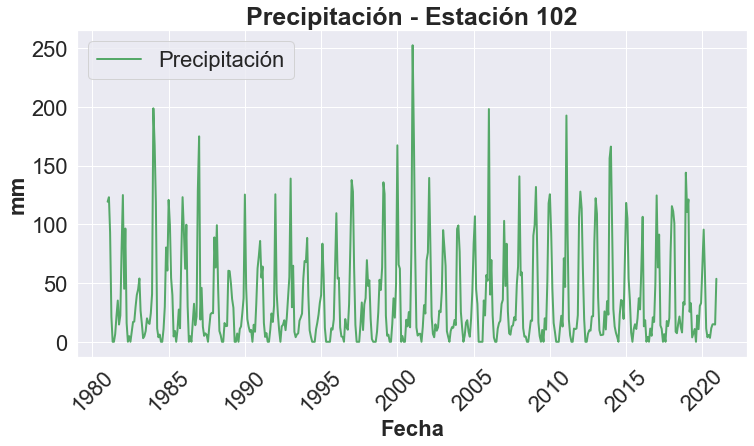

In [32]:
d1=0
d2=480
plt.figure(figsize=(12,6))
plt.plot(consulta1.loc[d1:d2,'fecha'], consulta1.loc[d1:d2,'pp'], 'g', label='Precipitación', linewidth=2)
# plt.plot(data2.loc[d1:d2,'fecha'], data2.loc[d1:d2,l], 'mo:', label=lista_datos2[1]+' - '+l, linewidth=2)
plt.xticks(rotation = 45)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22,loc='upper left')
plt.title("Precipitación - Estación "+str(estacion), fontweight='bold',fontsize=25)
plt.xlabel('Fecha', fontweight='bold',fontsize=22)
plt.ylabel('mm', fontweight='bold',fontsize=22)
plt.show()

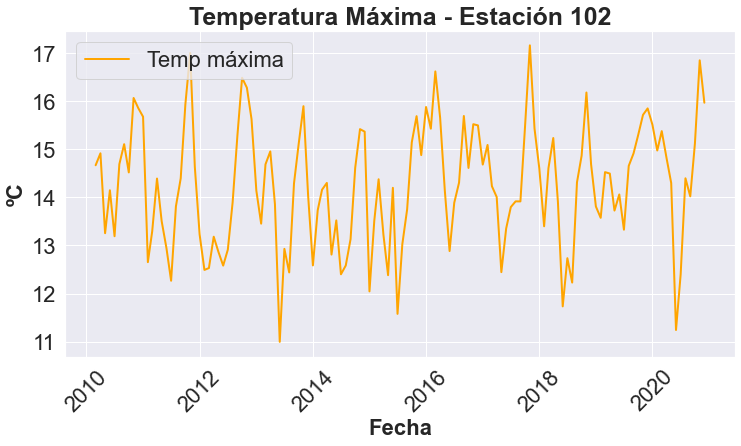

In [33]:
d1=350
d2=480
plt.figure(figsize=(12,6))
plt.plot(consulta1.loc[d1:d2,'fecha'], consulta1.loc[d1:d2,'tmax'], 'orange', label='Temp máxima', linewidth=2)
# plt.plot(data2.loc[d1:d2,'fecha'], data2.loc[d1:d2,l], 'mo:', label=lista_datos2[1]+' - '+l, linewidth=2)
plt.xticks(rotation = 45)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22,loc='upper left')
plt.title("Temperatura Máxima - Estación "+str(estacion), fontweight='bold',fontsize=25)
plt.xlabel('Fecha', fontweight='bold',fontsize=22)
plt.ylabel('ºC', fontweight='bold',fontsize=22)
plt.show()

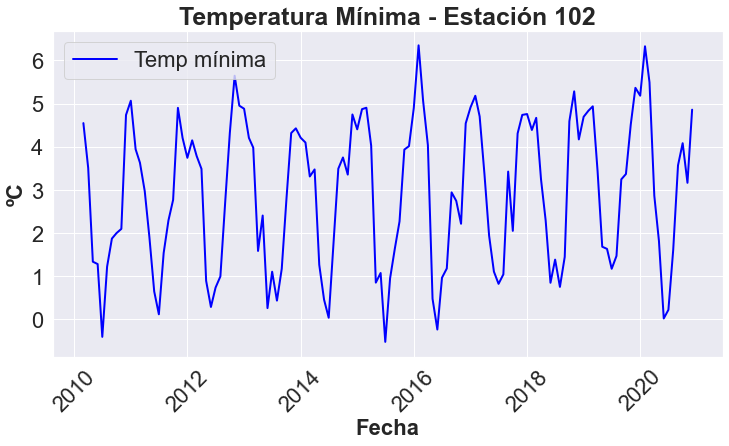

In [34]:
d1=350
d2=480
plt.figure(figsize=(12,6))
plt.plot(consulta1.loc[d1:d2,'fecha'], consulta1.loc[d1:d2,'tmin'], 'blue', label='Temp mínima', linewidth=2)
# plt.plot(data2.loc[d1:d2,'fecha'], data2.loc[d1:d2,l], 'mo:', label=lista_datos2[1]+' - '+l, linewidth=2)
plt.xticks(rotation = 45)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22,loc='upper left')
plt.title("Temperatura Mínima - Estación "+str(estacion), fontweight='bold',fontsize=25)
plt.xlabel('Fecha', fontweight='bold',fontsize=22)
plt.ylabel('ºC', fontweight='bold',fontsize=22)
plt.show()

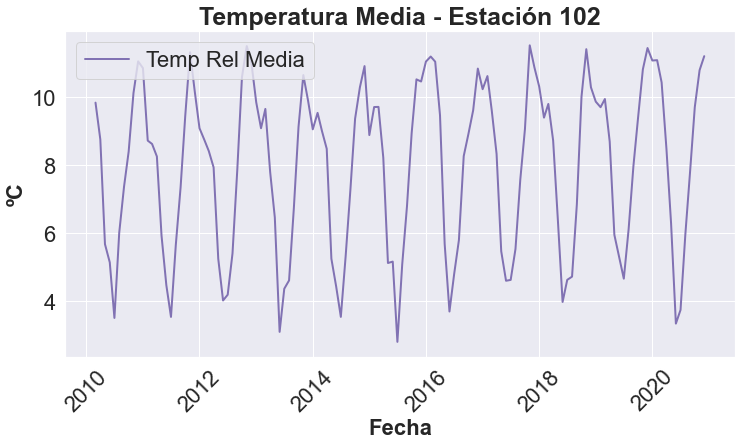

In [35]:
d1=350
d2=480
plt.figure(figsize=(12,6))
plt.plot(consulta1.loc[d1:d2,'fecha'], consulta1.loc[d1:d2,'tmed'], 'm', label='Temp Rel Media', linewidth=2)
# plt.plot(data2.loc[d1:d2,'fecha'], data2.loc[d1:d2,l], 'mo:', label=lista_datos2[1]+' - '+l, linewidth=2)
plt.xticks(rotation = 45)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22,loc='upper left')
plt.title("Temperatura Media - Estación "+str(estacion), fontweight='bold',fontsize=25)
plt.xlabel('Fecha', fontweight='bold',fontsize=22)
plt.ylabel('ºC', fontweight='bold',fontsize=22)
plt.show()

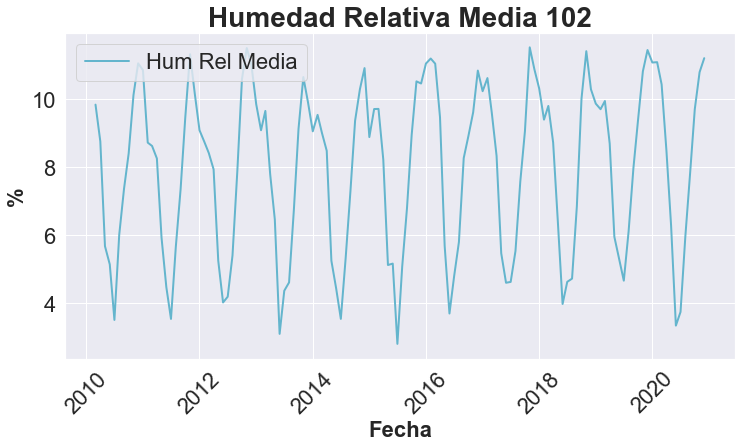

In [36]:
d1=350
d2=480
plt.figure(figsize=(12,6))
plt.plot(consulta1.loc[d1:d2,'fecha'], consulta1.loc[d1:d2,'tmed'], 'c', label='Hum Rel Media', linewidth=2)
# plt.plot(data2.loc[d1:d2,'fecha'], data2.loc[d1:d2,l], 'mo:', label=lista_datos2[1]+' - '+l, linewidth=2)
plt.xticks(rotation = 45)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22,loc='upper left')
plt.title("Humedad Relativa Media "+str(estacion), fontweight='bold',fontsize=28)
plt.xlabel('Fecha', fontweight='bold',fontsize=22)
plt.ylabel('%', fontweight='bold',fontsize=22)
plt.show()

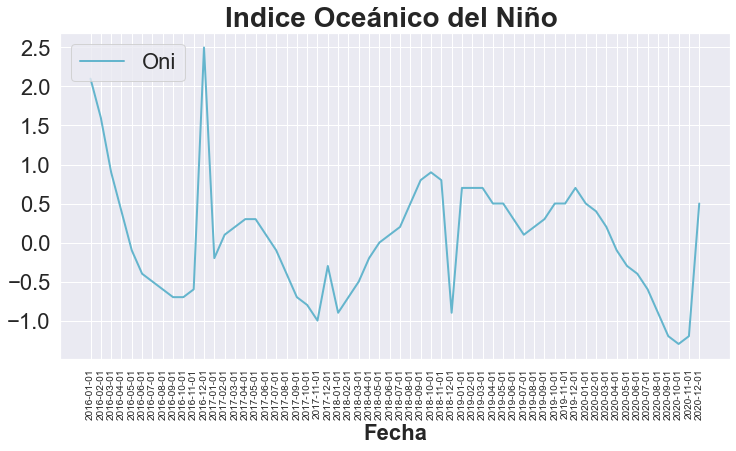

In [103]:
d1=420
d2=480
plt.figure(figsize=(12,6))
plt.plot(doni.loc[d1:d2,'fecha'], doni.loc[d1:d2,'oni'], 'c', label='Oni', linewidth=2)
plt.xticks(rotation = 90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=22)
plt.legend(fontsize=22,loc='upper left')
plt.title("Indice Oceánico del Niño ", fontweight='bold',fontsize=28)
plt.xlabel('Fecha', fontweight='bold',fontsize=22)
#plt.ylabel('ONI', fontweight='bold',fontsize=22)
plt.show()

In [39]:
consulta2 = datos
variable='pp'
consulta2 = datos[['mes','estacion',variable]]
# consulta1[consulta1['estacion'].astype(int) == estacion].reset_index(drop=True)
consulta2

,mes,estacion,pp
0,1,aeropuerto,118.149
1,1,andamarca,102.230
2,1,antequera,119.242
3,1,chillca,109.041
4,1,choquecota,219.247
...,...,...,...
11515,12,ayoayo,65.049
11516,12,berenguela,50.989
11517,12,calacoto,87.368
11518,12,catacora,104.318


In [40]:
datos.columns

Index(['fecha', 'anio', 'mes', 'id', 'pp', 'tmax', 'tmin', 'tmed', 'hmed',
       'spi3', 'spi12', 'spei3', 'spei12', 'estacion', 'depto', 'altitud',
       'lon', 'lat', 'codigo'],
      dtype='object')

In [45]:
def variable(cad):
    if (cad.count('pp')>0): return 'Precipitación','[mm]'
    elif (cad.count('tmax')>0): return 'Temperatura Máxima','°C'
    elif (cad.count('tmin')>0): return 'Temperatura Mínima','°C'
    elif (cad.count('tmed')>0): return 'Temperatura Media','°C'
    elif (cad.count('hmed')>0): return 'Humedad Relativa Media','%'
    else: return cad.upper(),cad.upper()

def graficar_caja_total(x_lbl, datos, titulo='BoxPlot',):
    for i in range(4,9):
        if (datos.columns[i].count('i1')>0):
            continue
        else:
            
            nombre,unidad = variable(datos.columns[i])
            titulo = 'Diagrama de Cajas de '+nombre+' por '+x_lbl.capitalize()
            subdatos = datos[['mes','estacion',datos.columns[i]]]
            sns.set(rc={'figure.figsize':(15.7,8.27)})
            plt.title(titulo, c='darkblue', fontweight='bold', fontsize=23)
            sns.boxplot(x=x_lbl, y=datos.columns[i], data=subdatos)
            plt.ylabel(unidad, fontweight='bold', fontsize=25)
            plt.xlabel(x_lbl, fontweight='bold', fontsize=25)
            plt.xticks(fontsize=25)
            plt.yticks(fontsize=25)
            plt.show()
            

## Diagramas de Cajas de Precipitación , Temperatura y Humedad

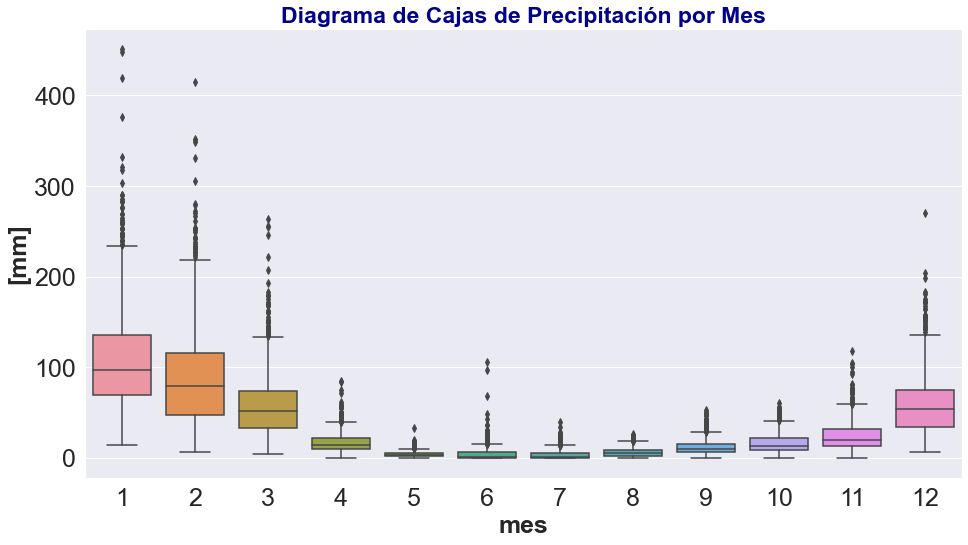

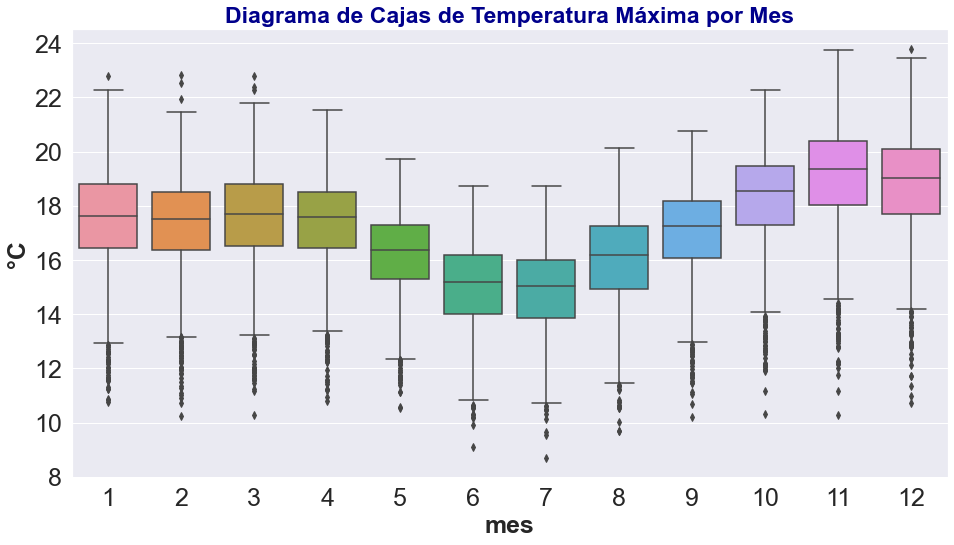

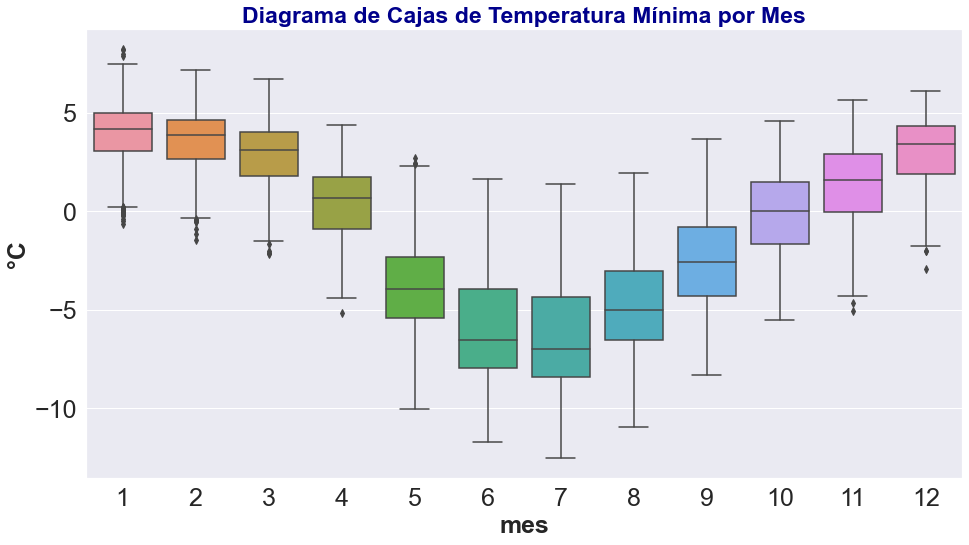

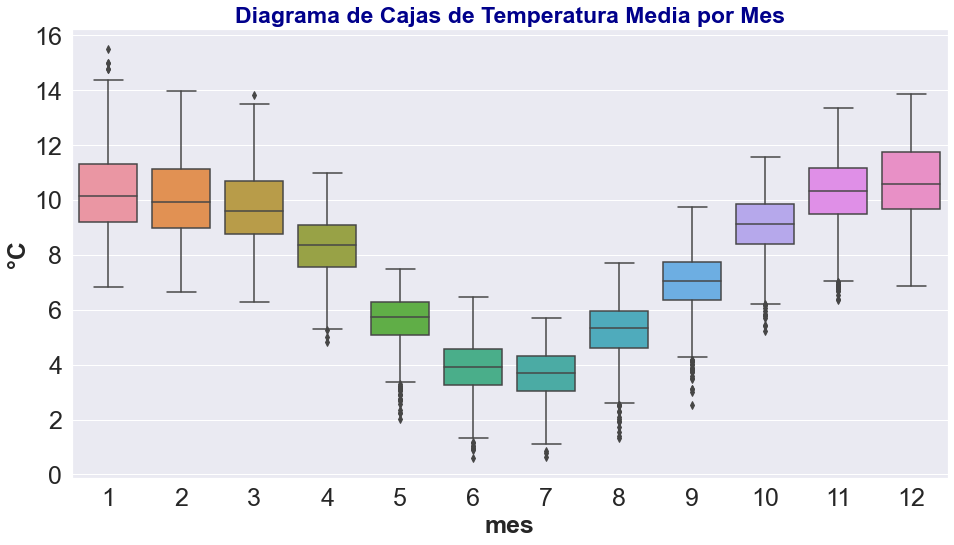

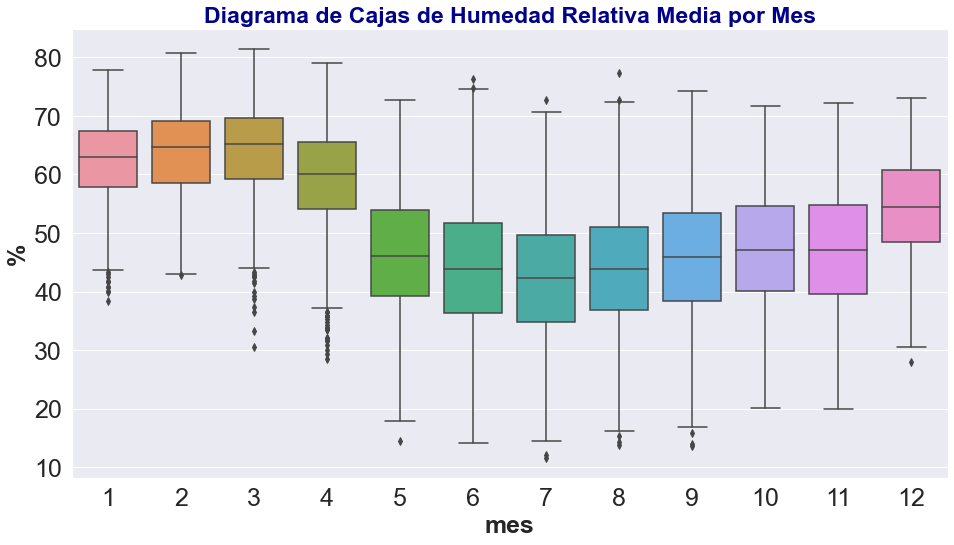

In [46]:
'''Diagrama de cajas por Variable mensual de todas las estaciones'''
graficar_caja_total('mes', datos=datos)

In [63]:
def graficar_caja_total1(x_lbl, datos, titulo='BoxPlot',):
    for i in range(4,9):
        if (datos.columns[i].count('i1')>0):
            continue
        else:   
            nombre,unidad = variable(datos.columns[i])
            titulo = 'Diagrama de Cajas de '+nombre+' por '+x_lbl.capitalize()
            subdatos = datos[['mes','estacion',datos.columns[i]]]
            sns.set(rc={'figure.figsize':(15.7,8.27)})
            plt.title(titulo, c='darkblue', fontweight='bold', fontsize=23)
            sns.boxplot(x=x_lbl, y=datos.columns[i], data=subdatos)
            plt.ylabel(unidad, fontweight='bold', fontsize=25)
            plt.xlabel(x_lbl, fontweight='bold', fontsize=15)
            plt.xticks(rotation = 65)
            plt.xticks(fontsize=15)
            plt.yticks(fontsize=25)
            plt.show()

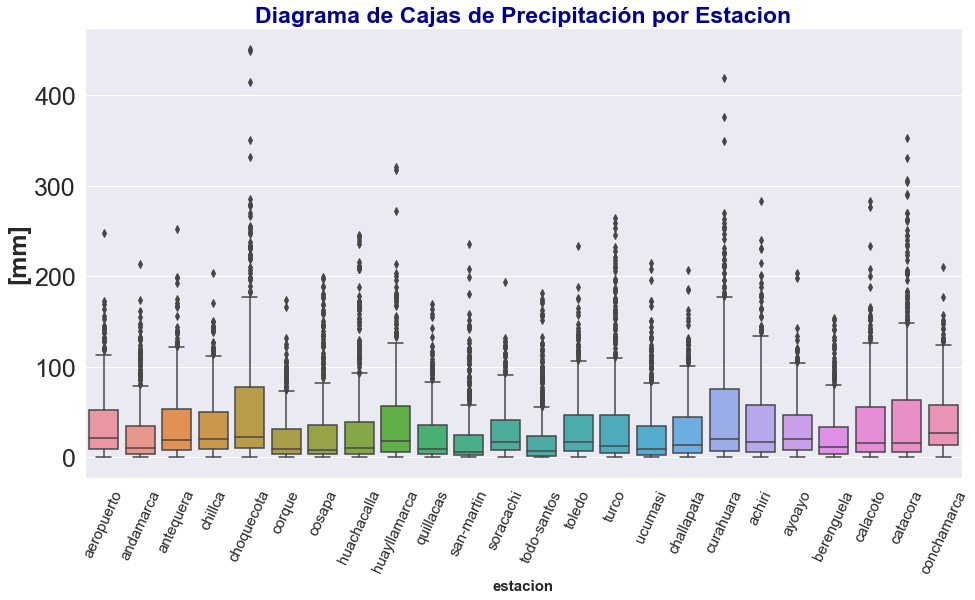

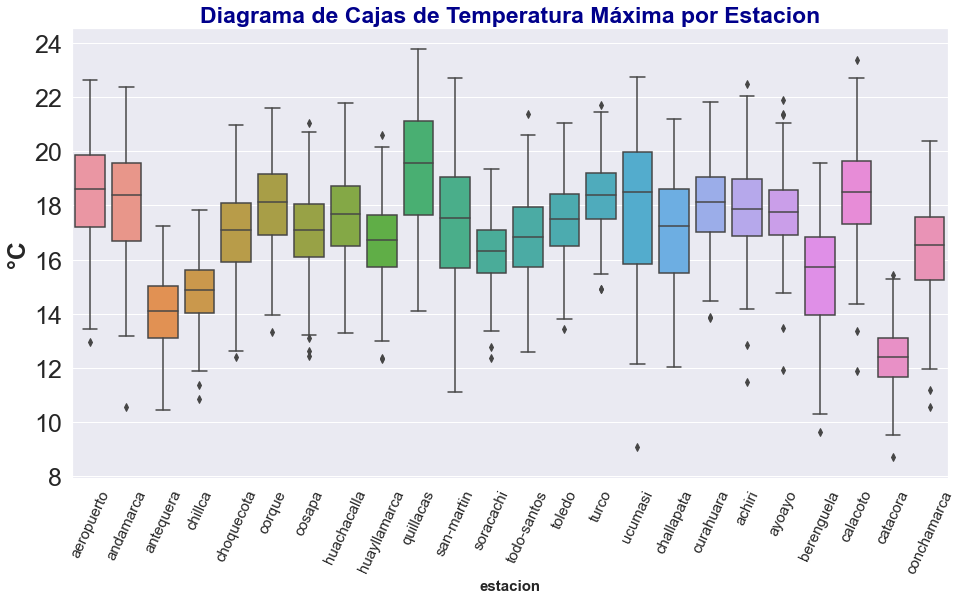

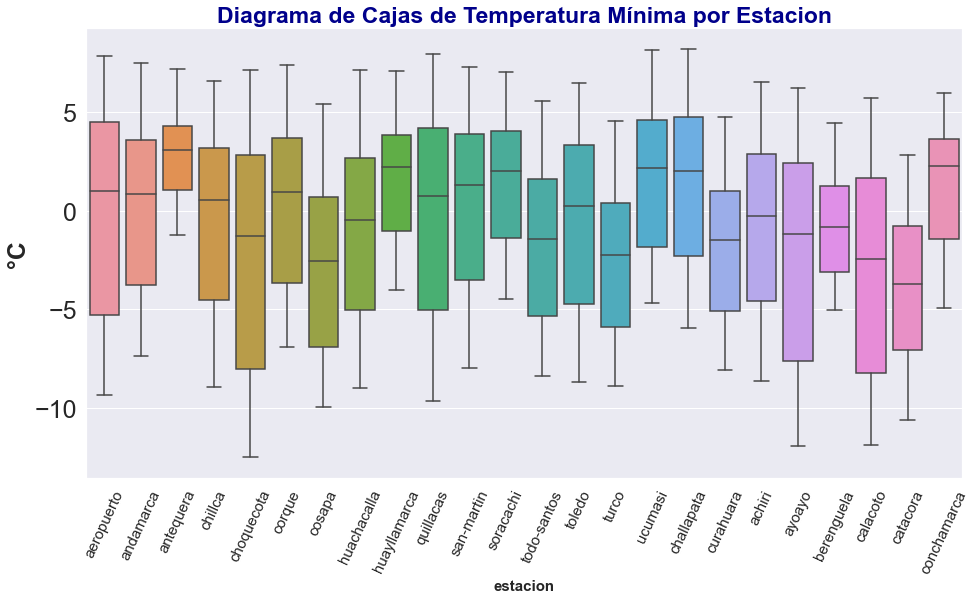

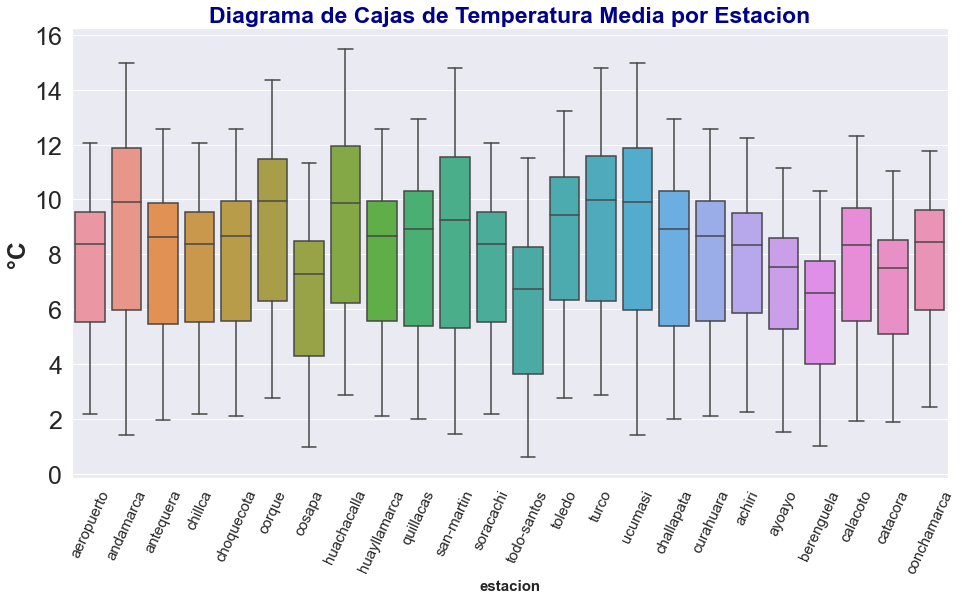

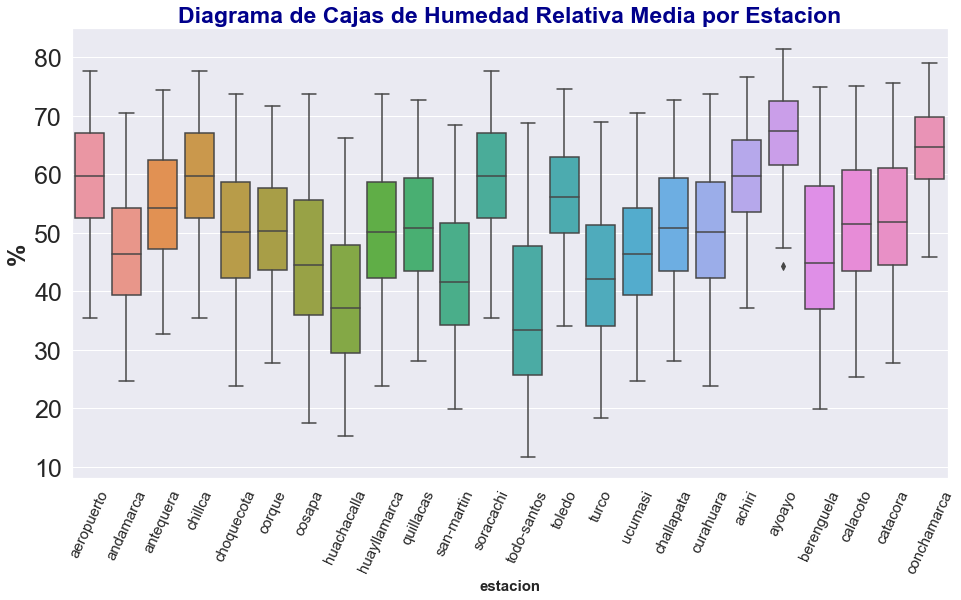

In [64]:
'''Diagrama de cajas por Variable respecto a las estaciones '''
graficar_caja_total1('estacion', datos=datos)

## Diagramas de Cajas de ONI

Text(0.5, 1.0, 'Diagrama de Cajas ONI')

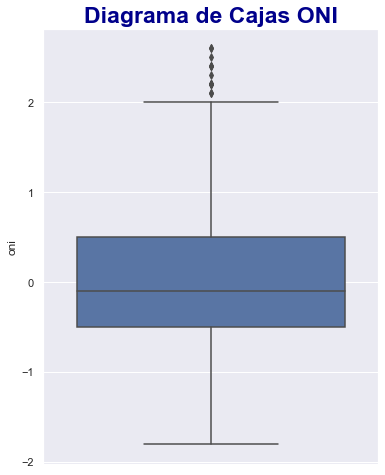

In [109]:
sns.set(rc={'figure.figsize':(6,8)})
sns.boxplot( y='oni', data=doni)
plt.title('Diagrama de Cajas ONI', c='darkblue', fontweight='bold', fontsize=23)

## Funciones Distribución de Precipitación , Temperatura y Humedad

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

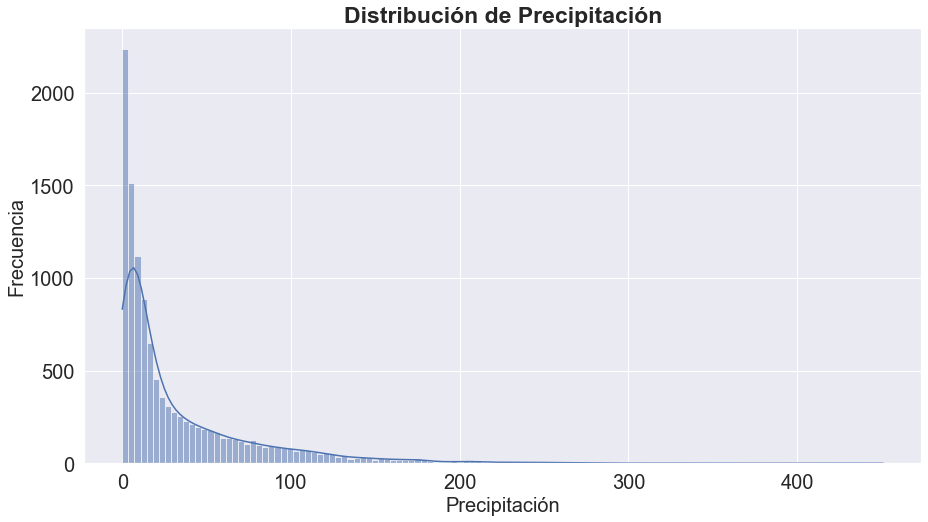

In [65]:
'''Distribución de precipitación'''
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(datos['pp'],kde=True)
plt.title('Distribución de Precipitación',size=23, weight='bold')
plt.xlabel("Precipitación",size=20)
plt.ylabel("Frecuencia",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

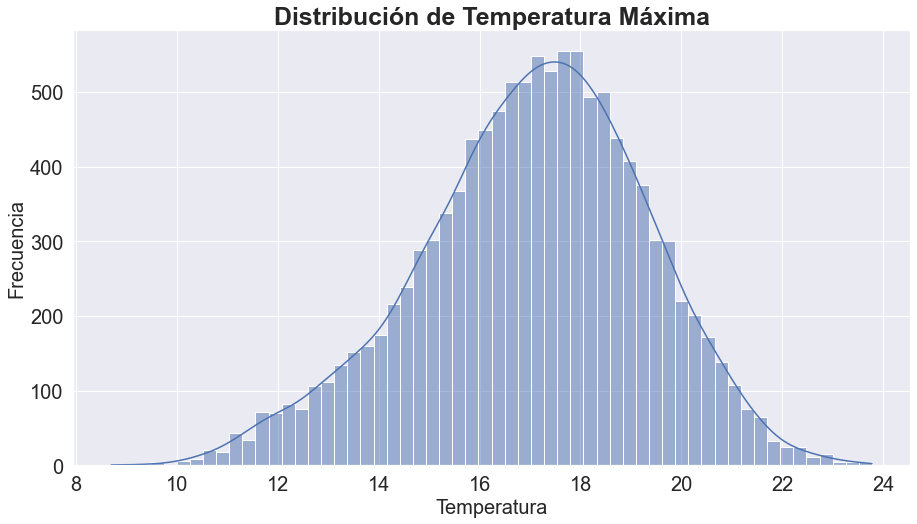

In [66]:
'''Distribución de Temperatura Máxima'''
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(datos['tmax'],kde=True)
plt.title('Distribución de Temperatura Máxima',size=25, weight='bold')
plt.xlabel("Temperatura",size=20)
plt.ylabel("Frecuencia",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

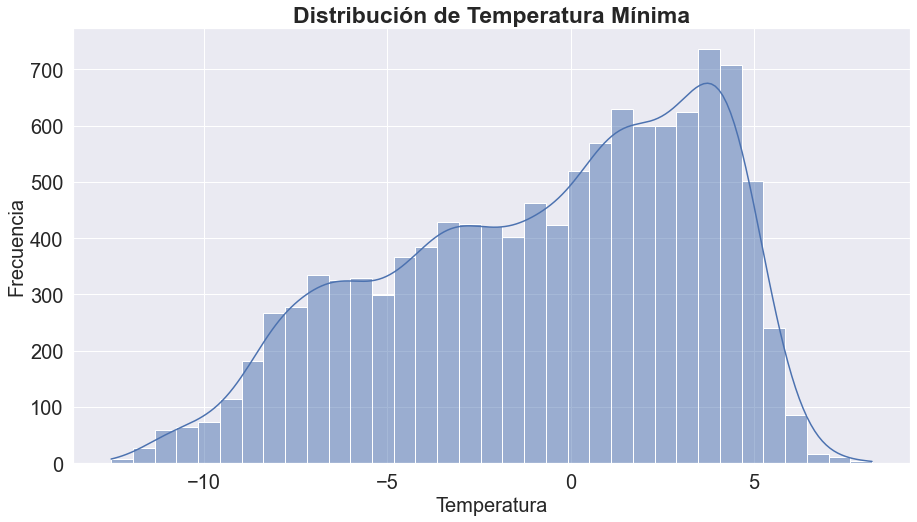

In [67]:
'''Distribución de Temperatura Mínima'''
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(datos['tmin'],kde=True)
plt.title('Distribución de Temperatura Mínima',size=23, weight='bold')
plt.xlabel("Temperatura",size=20)
plt.ylabel("Frecuencia",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

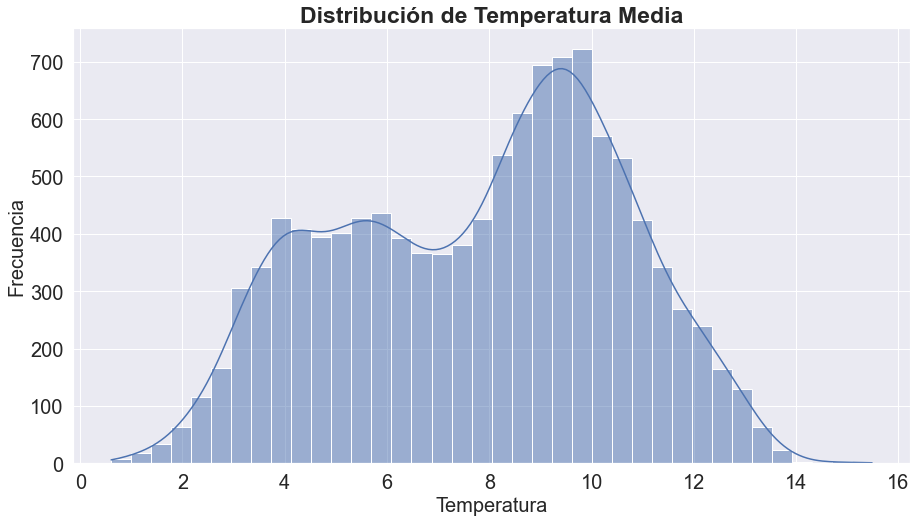

In [68]:
'''Distribución de Temperatura Media '''
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(datos['tmed'],kde=True)
plt.title('Distribución de Temperatura Media',size=23, weight='bold')
plt.xlabel("Temperatura",size=20)
plt.ylabel("Frecuencia",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

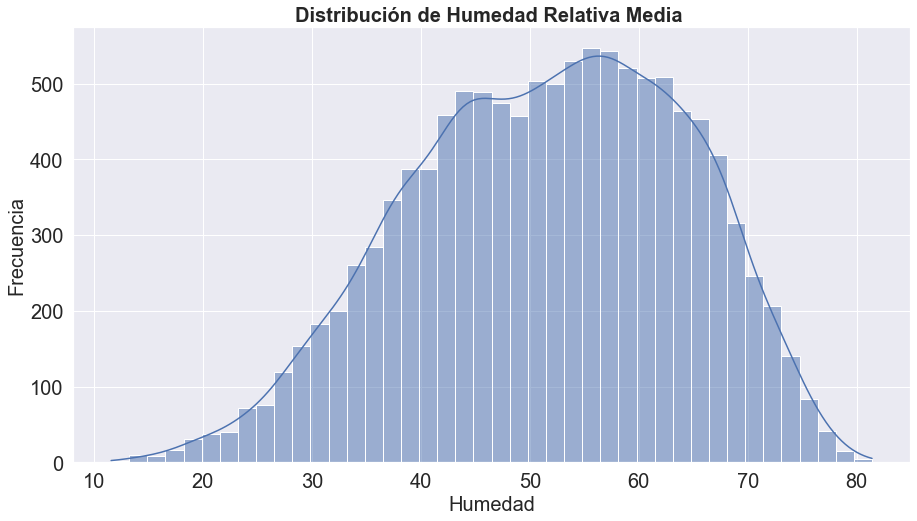

In [69]:
'''Distribución de Humedad Relativa Media '''
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(datos['hmed'],kde=True)
plt.title('Distribución de Humedad Relativa Media ',size=20, weight='bold')
plt.xlabel("Humedad",size=20)
plt.ylabel("Frecuencia",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

## Funciones Distribución de SPI3, SPEI3, SPI12 Y SPEI12

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

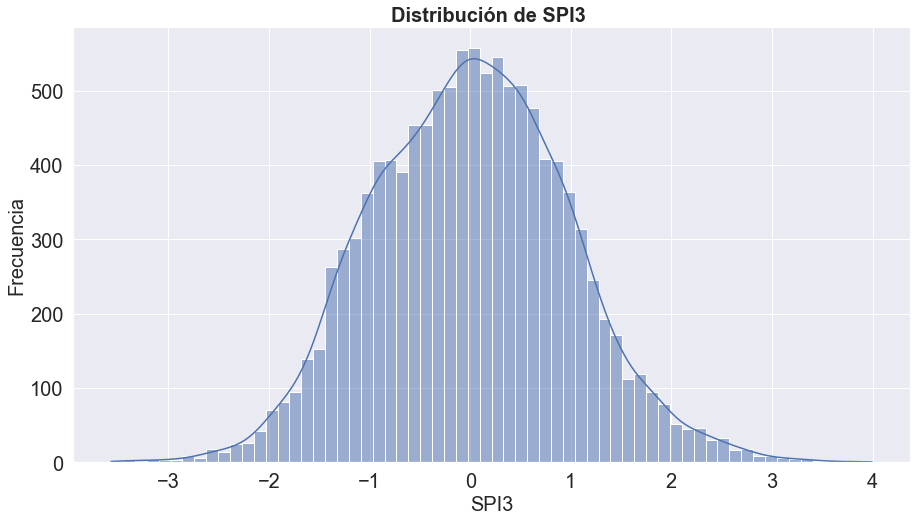

In [70]:
'''Distribución de SPI3'''
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(datos['spi3'],kde=True)
plt.title('Distribución de SPI3 ',size=20, weight='bold')
plt.xlabel("SPI3",size=20)
plt.ylabel("Frecuencia",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

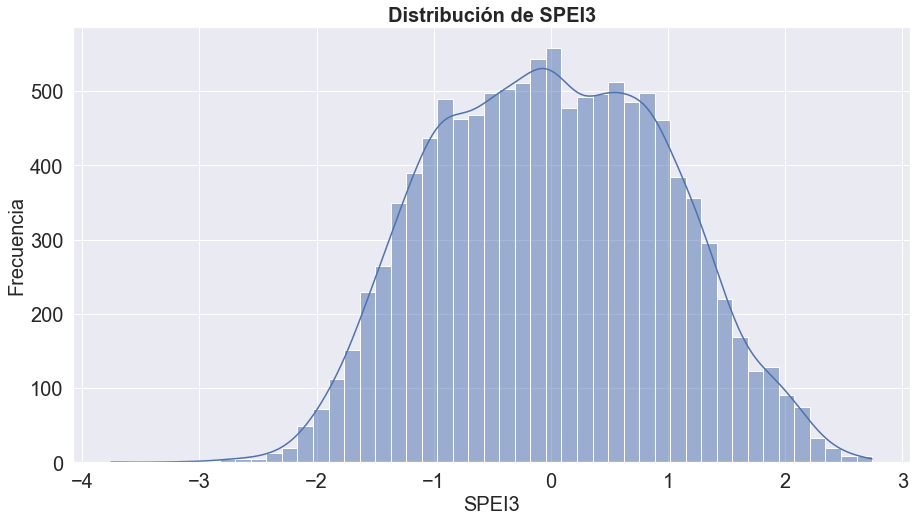

In [71]:
'''Distribución de SPEI3'''
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(datos['spei3'],kde=True)
plt.title('Distribución de SPEI3',size=20, weight='bold')
plt.xlabel("SPEI3",size=20)
plt.ylabel("Frecuencia",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

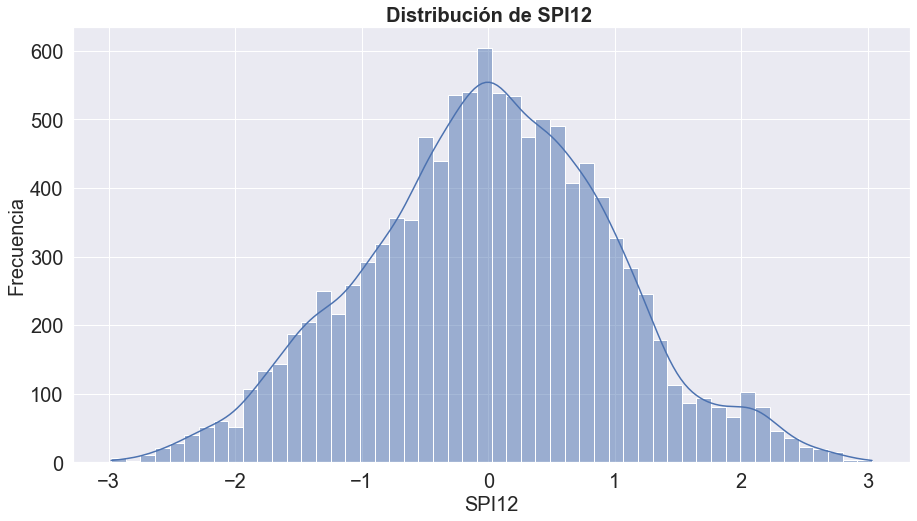

In [72]:
'''Distribución de SPI12'''
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(datos['spi12'],kde=True)
plt.title('Distribución de SPI12 ',size=20, weight='bold')
plt.xlabel("SPI12",size=20)
plt.ylabel("Frecuencia",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

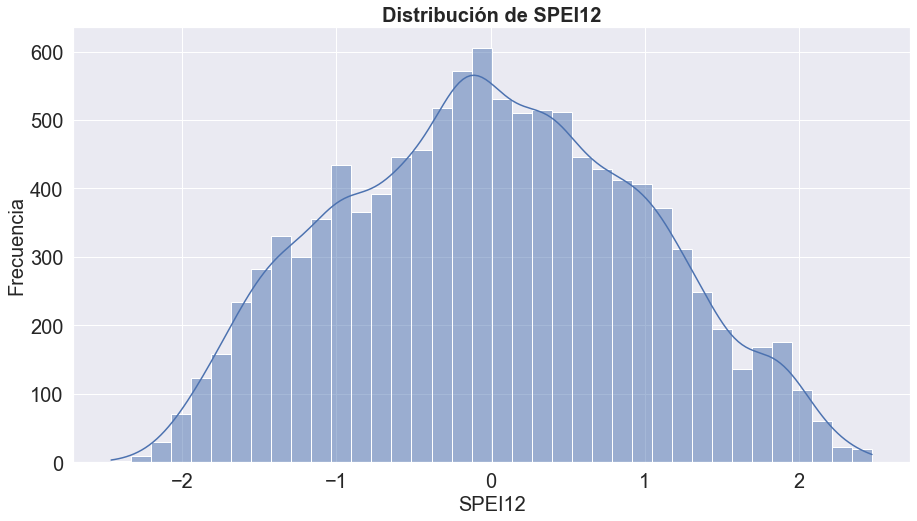

In [73]:
'''Distribución de SPEI12'''
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(datos['spei12'],kde=True)
plt.title('Distribución de SPEI12',size=20, weight='bold')
plt.xlabel("SPEI12",size=20)
plt.ylabel("Frecuencia",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

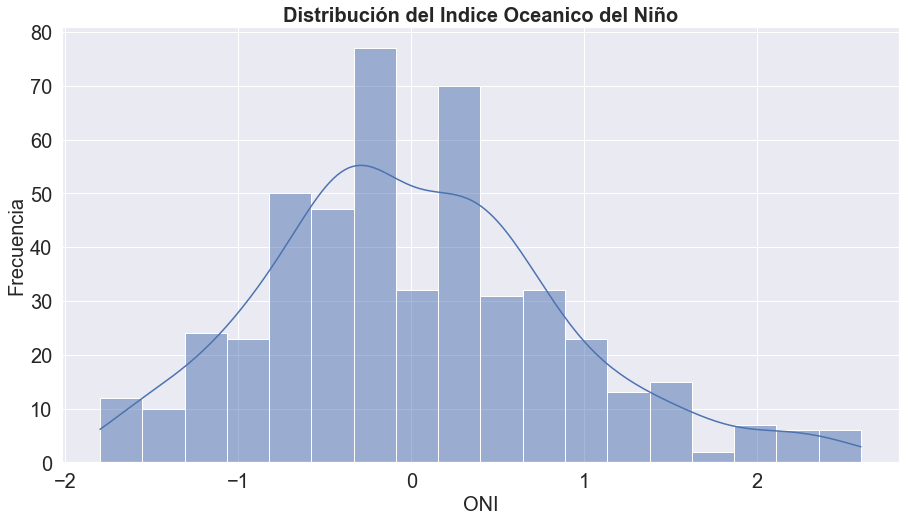

In [111]:
'''Distribución de ONI'''
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(doni['oni'],kde=True)
plt.title('Distribución del Indice Oceanico del Niño',size=20, weight='bold')
plt.xlabel("ONI",size=20)
plt.ylabel("Frecuencia",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

## Verificación de datos faltantes y datos nulos

In [112]:
datos.describe()

,anio,mes,id,pp,tmax,tmin,tmed,hmed,spi3,spi12,spei3,spei12,altitud,lon,lat,codigo
count,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11472.000000,11256.000000,11472.000,11256.000000,11520.000000,11520.000000,11520.000000,11520.000000
mean,2000.500000,6.500000,134.166667,33.598820,17.037100,-0.729409,7.806132,51.602942,0.008031,0.002627,-inf,0.005164,3873.541667,-67.885577,-18.140744,2183.333333
std,11.543897,3.452202,39.867826,45.131442,2.265388,4.281310,2.793143,12.601594,0.975905,0.984134,NaN,0.980756,139.161223,0.782328,0.683928,2008.560099
min,1981.000000,1.000000,100.000000,0.000000,8.696000,-12.520000,0.604000,11.573000,-3.568000,-2.980000,-inf,-2.461000,3702.000000,-69.486389,-19.275000,0.000000
25%,1990.750000,3.750000,107.750000,5.101250,15.624750,-3.952000,5.488500,42.473500,-0.688000,-0.637000,-0.759,-0.733250,3761.000000,-68.469733,-18.775764,0.000000
50%,2000.500000,6.500000,115.500000,14.466500,17.184500,0.023500,8.275000,52.351000,0.007500,0.017000,-0.004,-0.010000,3854.500000,-67.788806,-18.137389,4003.000000
75%,2010.250000,9.250000,140.750000,45.846750,18.607500,2.924000,9.939000,61.476500,0.661000,0.666250,0.754,0.732000,3929.000000,-67.324431,-17.670319,4023.750000
max,2020.000000,12.000000,205.000000,450.919000,23.780000,8.213000,15.486000,81.417000,3.993000,3.032000,2.741,2.473000,4253.000000,-66.777778,-17.094200,4083.000000


In [115]:
datos['spei3']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
11515   -0.804
11516   -0.286
11517   -0.477
11518    0.383
11519   -0.744
Name: spei3, Length: 11520, dtype: float64

In [125]:
'''No se encontraron datos faltantes, ni atípicos; pero sí se encontró un dato no válido -inf'''
no_valido=datos[datos['spei3']=='-inf']
no_valido

,fecha,anio,mes,id,pp,tmax,tmin,tmed,hmed,spi3,spi12,spei3,spei12,estacion,depto,altitud,lon,lat,codigo


In [126]:
datos1=datos[datos['id']=='200'].reset_index(drop=True)
datos1

,fecha,anio,mes,id,pp,tmax,tmin,tmed,hmed,spi3,spi12,spei3,spei12,estacion,depto,altitud,lon,lat,codigo


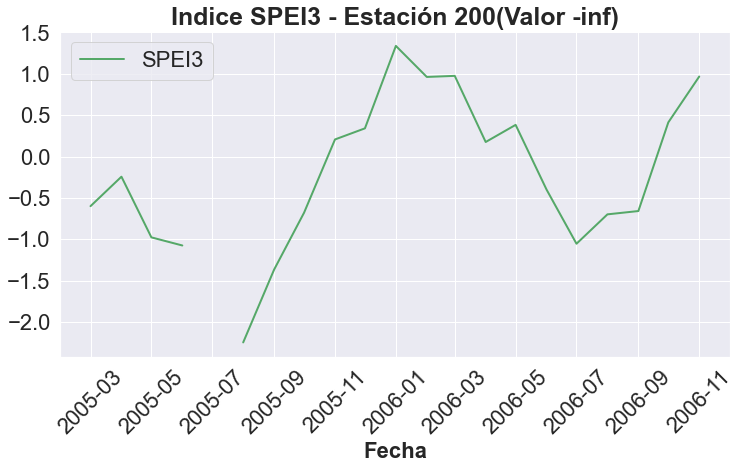

In [135]:
consulta1 = datos
estacion = 200
consulta1=consulta1[consulta1['id'].astype(int) == estacion].reset_index(drop=True)

d1=290
d2=310
plt.figure(figsize=(12,6))
plt.plot(consulta1.loc[d1:d2,'fecha'], consulta1.loc[d1:d2,'spei3'], 'g', label='SPEI3', linewidth=2)
plt.xticks(rotation = 45)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22,loc='upper left')
plt.title("Indice SPEI3 - Estación "+str(estacion)+'(Valor -inf)', fontweight='bold',fontsize=25)
plt.xlabel('Fecha', fontweight='bold',fontsize=22)
plt.show()

In [142]:
sinf=datos[(datos['mes']==7) & (datos['estacion']=='200')].reset_index(drop=True)['spei3']
sinf1=sinf.replace([np.inf, -np.inf], np.nan) 
sinf1.min()

nan

In [139]:
datos.replace([np.inf,-np.inf], -1.523,inplace=True)
datos[(datos['mes']==7) & (datos['estacion']=='200')]['spei3']

Series([], Name: spei3, dtype: float64)